# Исследование закономерностей, определяющих успешность компьютерных игр.

# Цель проекта: 
**На основании данных интернет-магазина, который продаёт по всему миру компьютерные игры, выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.**

***Описание данных:***

* `Name`— название игры

* `Platform` — платформа

* `Year_of_Release` — год выпуска

* `Genre` — жанр игры

* `NA_sales` — продажи в Северной Америке (миллионы проданных копий)

* `EU_sales` — продажи в Европе (миллионы проданных копий)

* `JP_sales` — продажи в Японии (миллионы проданных копий)

* `Other_sales` — продажи в других странах (миллионы проданных копий)

* `Critic_Score` — оценка критиков (максимум 100)

* `User_Score` — оценка пользователей (максимум 10)

* `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st


 ### Откроем файл с данными и изучим общую информацию.

In [2]:
df = pd.read_csv('games.csv')

In [3]:
df

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [4]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


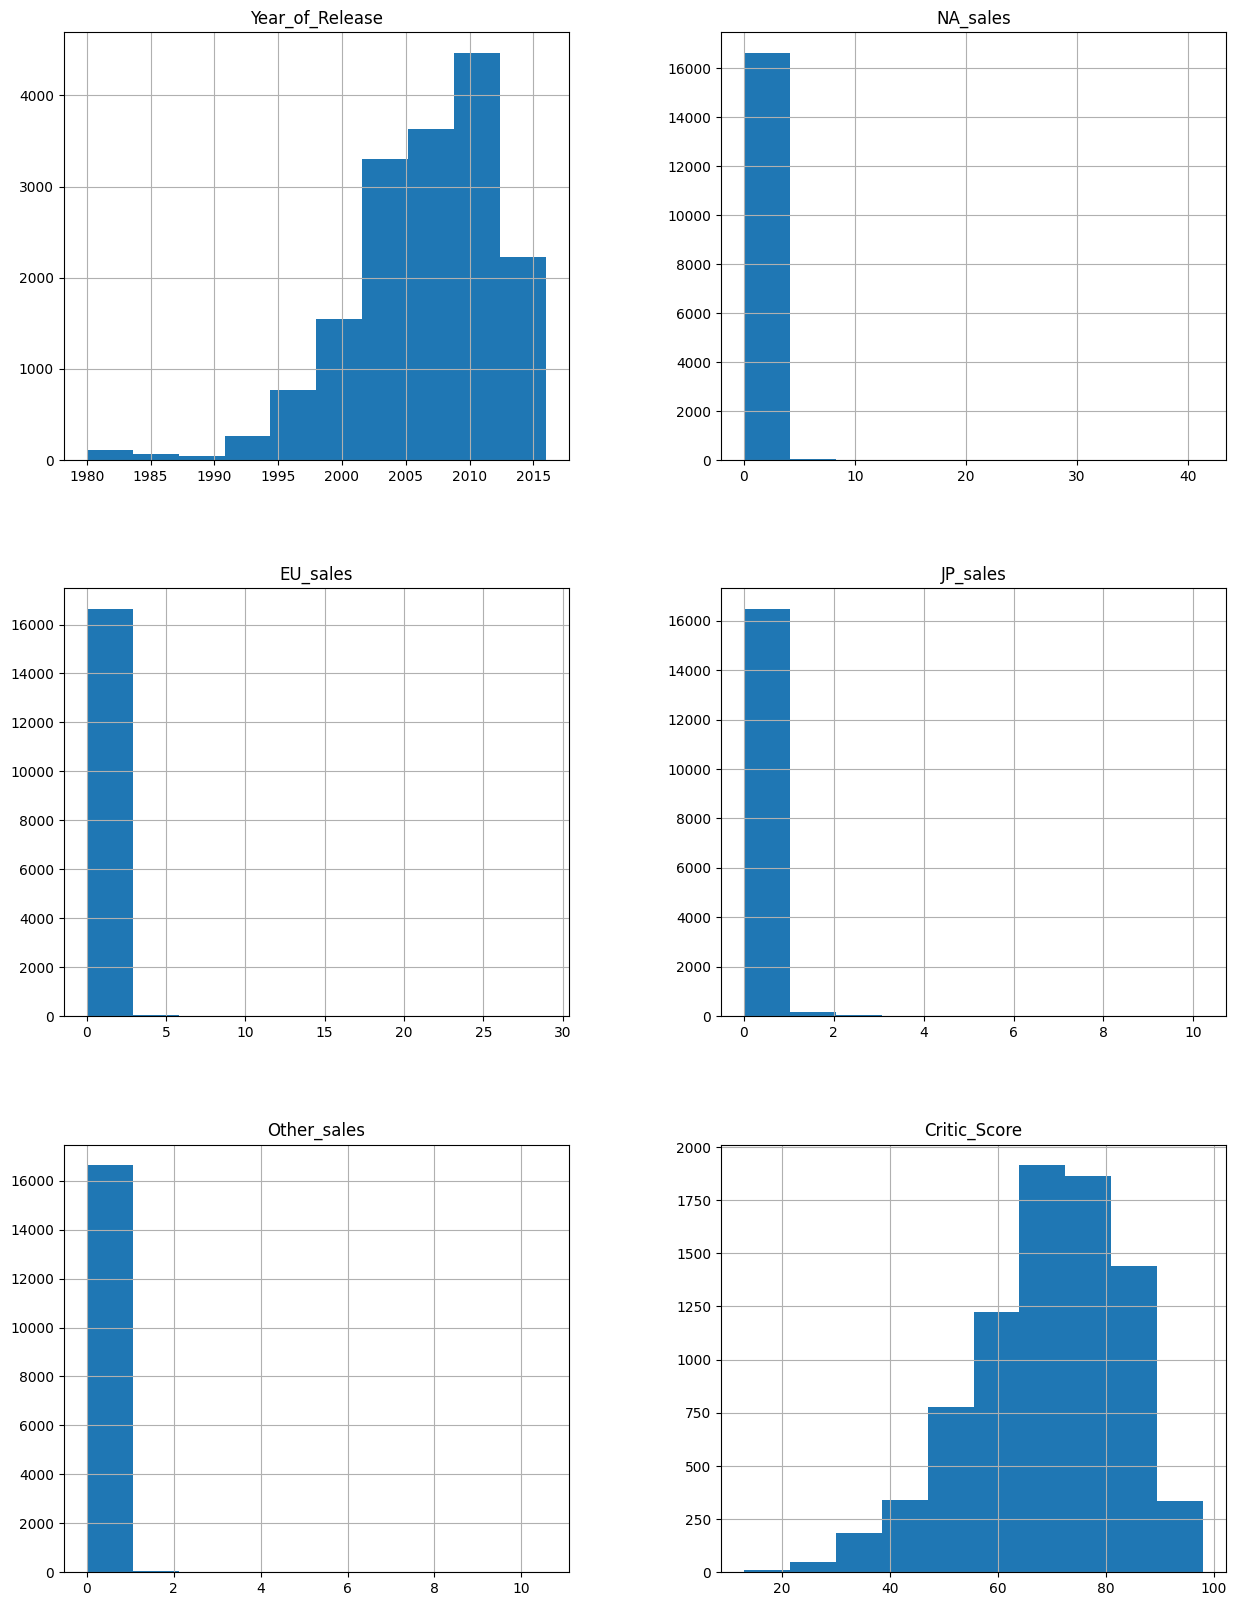

In [5]:
df.hist(figsize=(15, 20));

**Вывод:** Количество значений в столбцах различается. Значит, в данных есть пропущенные значения. В `year_of_release` должен быть тип данных int, а в `user_score` -  float, т.к. оценка пользователей - вещественное значение, а год - целое. Названия столбцов лучше привести к нижнему регистру. В столбце 'user_score' много значений 'tbd'.

### Подготовим данные.

#### Заменим названия столбцов (приведём к нижнему регистру).

In [6]:
df.columns = df.columns.str.lower()

In [7]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


#### Преобразуем данные в нужные типы и обработаем пропуски при необходимости.

В `year_of_release` изменим тип данных на  int,

а в `user_score` тип данных должен быть float, т.к. оценка пользователей - вещественное значение, а год - целое.



Прежде чем преобразовывать данные в нужные типы, посмотрим колличество пропусков в каждом столбце. В столбцах `year_of_release`,`name` и `genre` пропусков не много  и эти данные нам будут необходимы в дальнейшем, так что удалим здесь строки с пропусками. В столбцах `critic_score`, `user_score` и `rating` пропуски трогать не будем, т.к. можем в дальнейшем получить не корректные результаты.

In [8]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [9]:
df['user_score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

В столбце 'user_score' много значений 'tbd'. Это аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято. Акроним служит для отметки неясностей или пропусков, которые надо заполнить, в информации требований. Скорее всего, пользователи хотели оценить позже, может быть когда больше познакомятся с этой игрой, но так и не оценили. Так что исправим эти значения на NaN, когда будем менять тип данных в столбце на числовой.

In [10]:
df['user_score'] = pd.to_numeric(df['user_score'],errors='coerce')

In [11]:
df = df.dropna(subset = ['year_of_release','name','genre'])

Так же заменим, где это возможно, float64 на float32 для экономии памяти.

In [12]:
convert_dict = {'year_of_release': 'int32',
                'user_score': 'float32',
                'na_sales':   'float32',
                'eu_sales':   'float32',
                'jp_sales':   'float32',
                'other_sales':'float32',
                
                }
df = df.astype(convert_dict)


In [13]:
df['rating'].value_counts()

E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: rating, dtype: int64

По рейтингу компьтерных игр от организации ESRB (англ. Entertainment Software Rating Board):
* EC - «Для детей младшего возраста» 
* E10 - «Для всех от 10 лет и старше»  
* T - «Подросткам»
* E - «Для всех»  
* M - «Для взрослых»
* RP - «Рейтинг ожидается»

В колонке rating много пропусков, чтобы исследование было корректным, заполним пустые значения, значенем из рейтинга RP - «Рейтинг ожидается».

In [14]:
df['rating'] = df['rating'].fillna('RP')


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float32
 5   eu_sales         16444 non-null  float32
 6   jp_sales         16444 non-null  float32
 7   other_sales      16444 non-null  float32
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float32
 10  rating           16444 non-null  object 
dtypes: float32(5), float64(1), int32(1), object(4)
memory usage: 1.1+ MB


In [16]:
print(df.duplicated().sum())

0


Явных дубликатов выявлено не было.

#### Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [17]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [18]:
df.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.360001,28.959999,3.77,8.45,76.0,8.0,E,82.539993
1,Super Mario Bros.,NES,1985,Platform,29.080000,3.580000,6.81,0.77,NaN,NaN,RP,40.240002
2,Mario Kart Wii,Wii,2008,Racing,15.680000,12.760000,3.79,3.29,82.0,8.3,E,35.520000
3,Wii Sports Resort,Wii,2009,Sports,15.610000,10.930000,3.28,2.95,80.0,8.0,E,32.770000
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.270000,8.890000,10.22,1.00,NaN,NaN,RP,31.380001


**Вывод:**
В year_of_release изменили тип данных на int, а в user_score на float, т.к. оценка пользователей - вещественное значение, а год - целое. Так же заменили, где это возможно, float64 на float32 для экономии памяти. В столбцах year_of_release,name и genre пропуски удалили, их не много и эти данные нам будут необходимы в дальнейшем. В столбцах critic_score, user_score и rating пропуски трогать не стали, т.к. можем в дальнейшем получить не корректные результаты. В столбце 'user_score' было много значений 'tbd', заменили их на  на NaN. Явных дубликатов выявлено не было.

### Проведём исследовательский анализ данных.

#### Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

In [19]:
df.groupby('year_of_release')['name'].count()

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

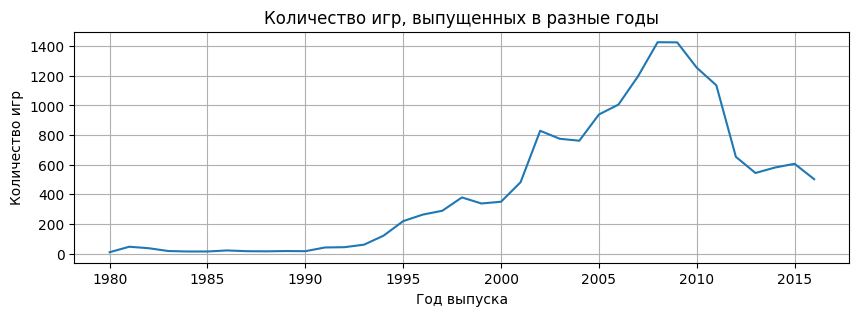

In [20]:
df.groupby('year_of_release')['name'].count().plot(figsize=(10,3),grid=True)
plt.title('Количество игр, выпущенных в разные годы')
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр');

   Заметен рост выпущенных игр с 1994г., более сильный скачок в 2002г., с 2010 количество выпущенных игр начинает падать. При анализе, всё же целесообразнее будет рассматривать период не раньше 2002 года, чтобы понять, что поспособствовало значительному росту, а позже и значительному падению количества выпущенных игр.

#### Посмотрим, как менялись продажи по платформам.

 Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. 

In [21]:
df.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(5)

platform
PS2     1233.559937
X360     961.239990
PS3      931.339966
Wii      891.179993
DS       802.780029
Name: total_sales, dtype: float32

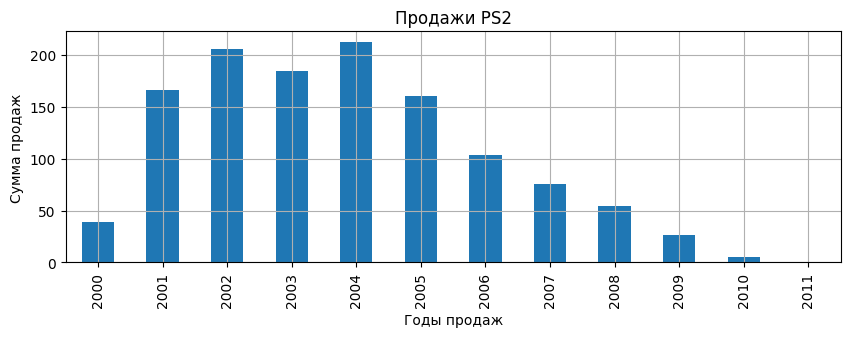

In [22]:
def sales_platform(name_platform):
    df[df['platform'] == name_platform].groupby('year_of_release')['total_sales'].sum().plot(kind='bar',figsize=(10,3),grid=True)
    plt.xlabel('Годы продаж')
    plt.ylabel('Сумма продаж');
sales_platform('PS2')
plt.title('Продажи PS2');


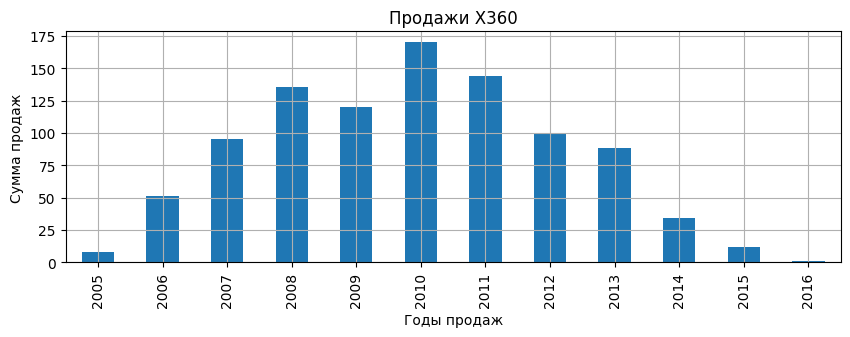

In [23]:
sales_platform('X360')
plt.title('Продажи X360');


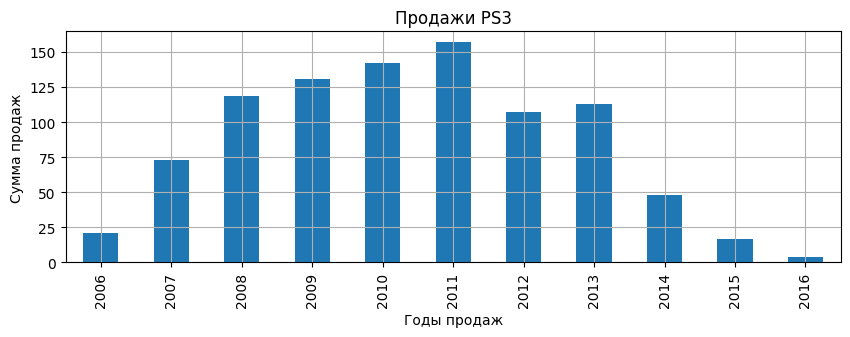

In [24]:
sales_platform('PS3')
plt.title('Продажи PS3');


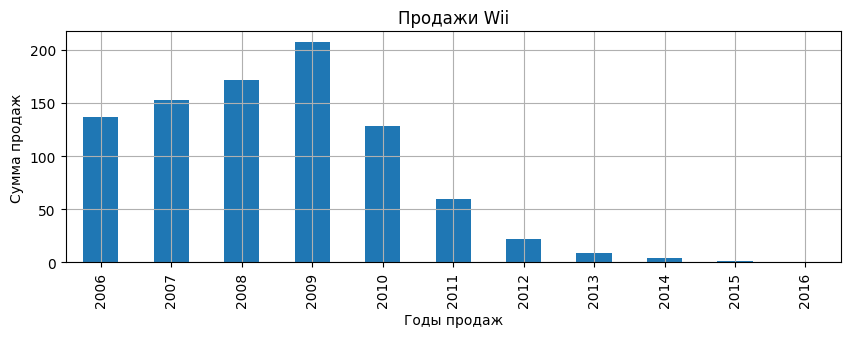

In [25]:
sales_platform('Wii')
plt.title('Продажи Wii');

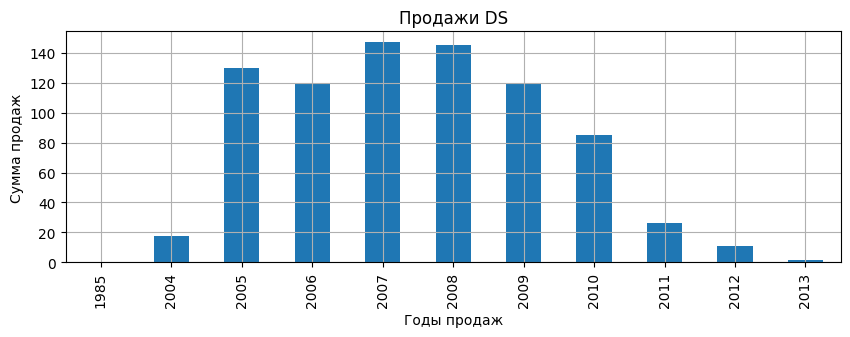

In [26]:
sales_platform('DS')
plt.title('Продажи DS');

Наибольшие суммарные продажи за все время у платформ PS2, X360, PS3, Wii и DS. Очень характерно, что срок существования платформы около 10 лет, а пик их развития приходится на 4-5 год. Так что, чтобы строить прогноз на 2017 год возьмём период за последние 4 года, чтобы пик развития приходился на 2017 год. Оптимальными данными для построения прогноза на 2017 год будут данные с 2013 года.

<!-- #### Возьмём данные за соответствующий актуальный период. Посмотрим какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ. -->

#### Возьмём данные за соответствующий актуальный период. Посмотрим, какие платформы лидируют по продажам, растут или падают. Выберем несколько потенциально прибыльных платформ.

In [27]:
current_period = df[df['year_of_release']>=2013]

In [28]:
current_period.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.049999
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.270000
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,RP,14.630000
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,RP,14.599999
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.620001


In [29]:
current_period.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(10)

platform
PS4     314.140015
PS3     181.429993
XOne    159.320007
3DS     143.250000
X360    136.800003
WiiU     64.629997
PC       39.430000
PSV      32.989998
Wii      13.660000
PSP       3.500000
Name: total_sales, dtype: float32

Это лидирующие по продажам платформы за период с 2013 года. Посмотрим, растут они или падают.

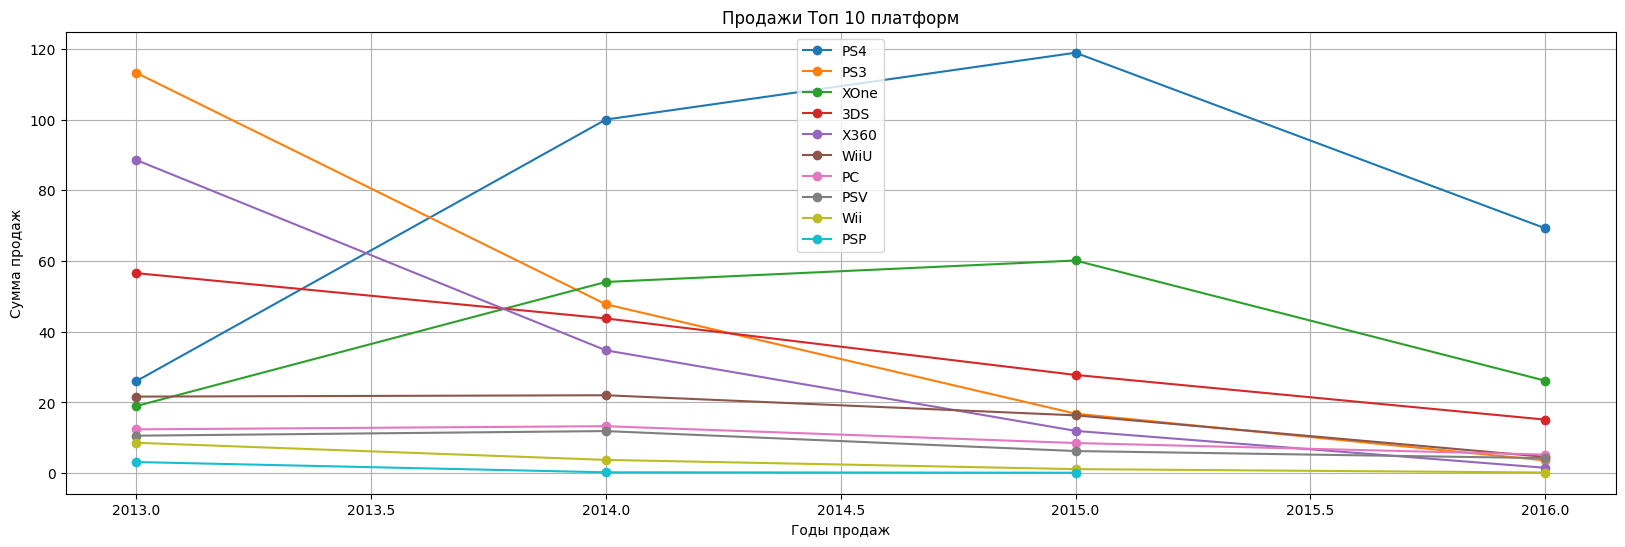

In [30]:
top_platforms =['PS4','PS3','XOne','3DS','X360','WiiU','PC','PSV','Wii','PSP']
def sales_top_platforms(el):
    for el in top_platforms:
        current_period[current_period['platform'] == el].groupby('year_of_release')['total_sales'].sum().plot(figsize=(20,6),grid=True,label=el,legend=True,style='o-')
sales_top_platforms(top_platforms)
plt.title('Продажи Топ 10 платформ')
plt.xlabel('Годы продаж')
plt.ylabel('Сумма продаж');

Продажи по всем платформам падают, но всё же наиболее прибыльными можно считать PS4, XOne и 3DS. Сумма продаж их выше в последнее время и появились они относительно недавно. Если учитывать срок существования около 10 лет, у них всё впереди. 

#### Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

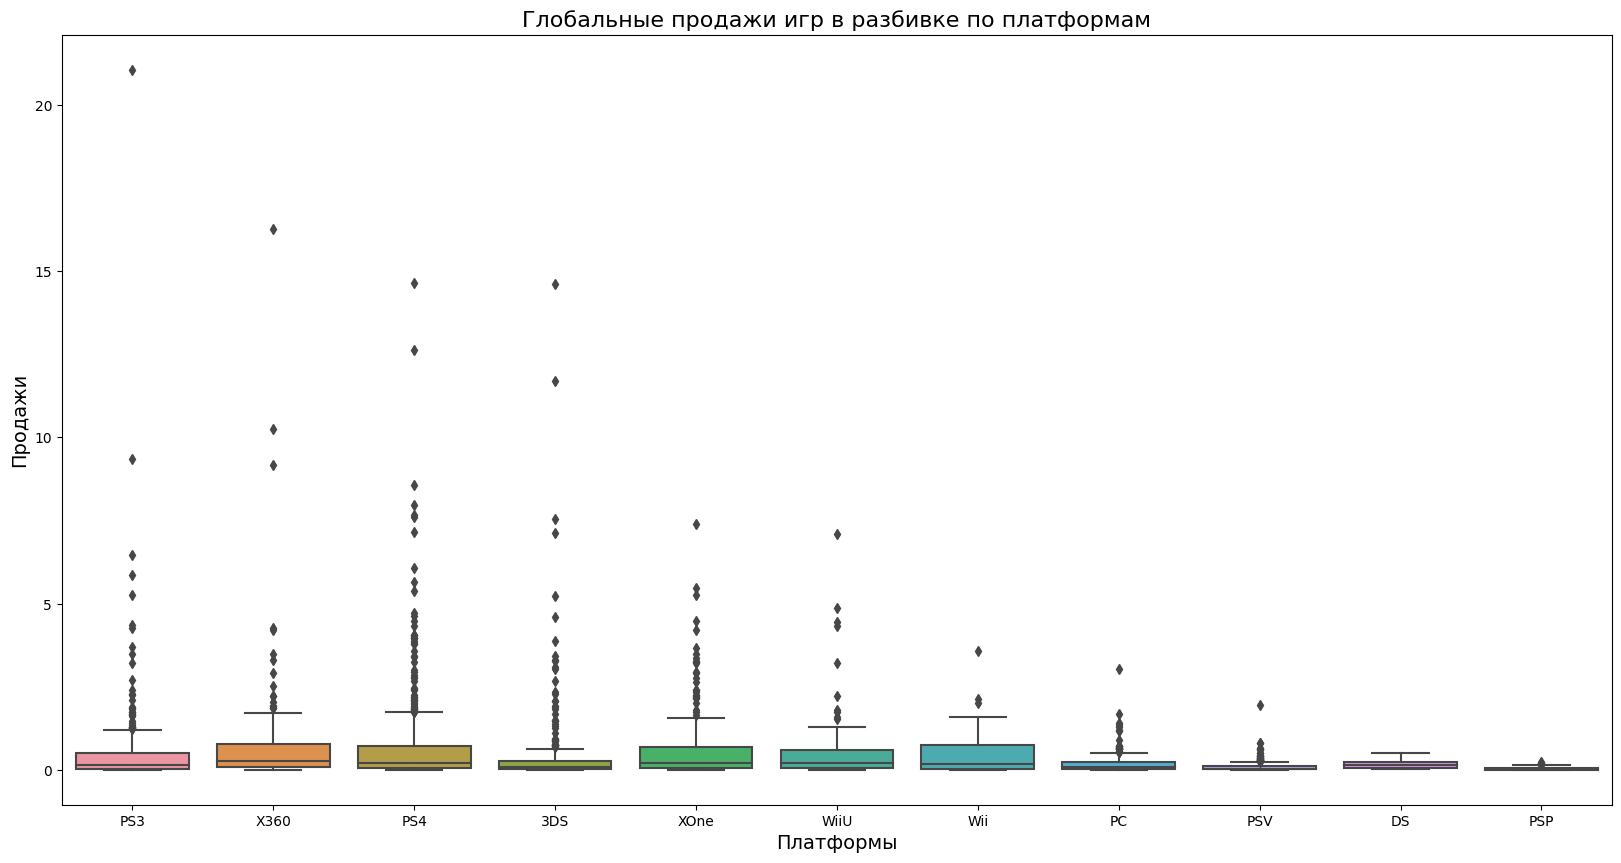

In [31]:
plt.figure(figsize=(20,10))
boxplot = sns.boxplot(x='platform', y='total_sales', data=current_period)
boxplot.axes.set_title('Глобальные продажи игр в разбивке по платформам', fontsize=16)
boxplot.set_xlabel('Платформы', fontsize=14)
boxplot.set_ylabel('Продажи', fontsize=14);

Посмотрим крупнее.

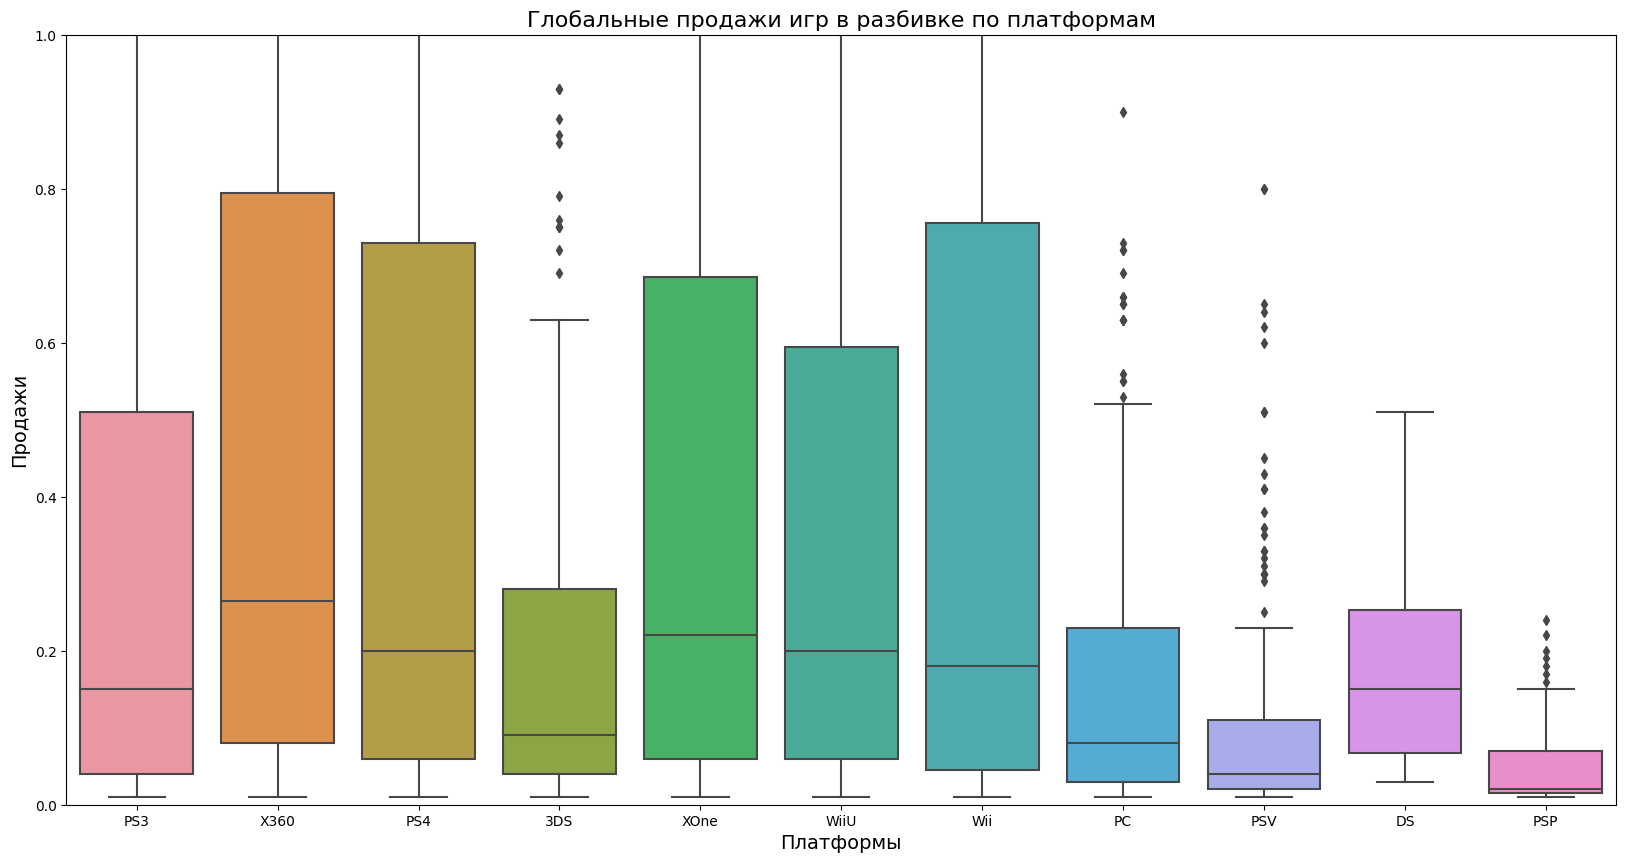

In [32]:
plt.figure(figsize=(20,10))
boxplot = sns.boxplot(x='platform', y='total_sales', data=current_period)
plt.ylim(0,1)
boxplot.axes.set_title('Глобальные продажи игр в разбивке по платформам', fontsize=16)
boxplot.set_xlabel('Платформы', fontsize=14)
boxplot.set_ylabel('Продажи', fontsize=14);

Наибольшие медианные продажи у платформ 'X360' и 'XOne', наименьшие у 'PSP'. У всех платформ медианы сдвинуты в сторону 1 квартиля, это говорит о больших выбросах. Всё верно, когда игра только выпущена, продажи максимальные, затем всё выравнивается.

#### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

Возьмём одну из перспективных платформ '3DS'.

Корелляция продаж от оценок пользователей 0.24150410485682997
Корелляция продаж от оценок критиков 0.3570566231203626


C:\Users\Asus\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


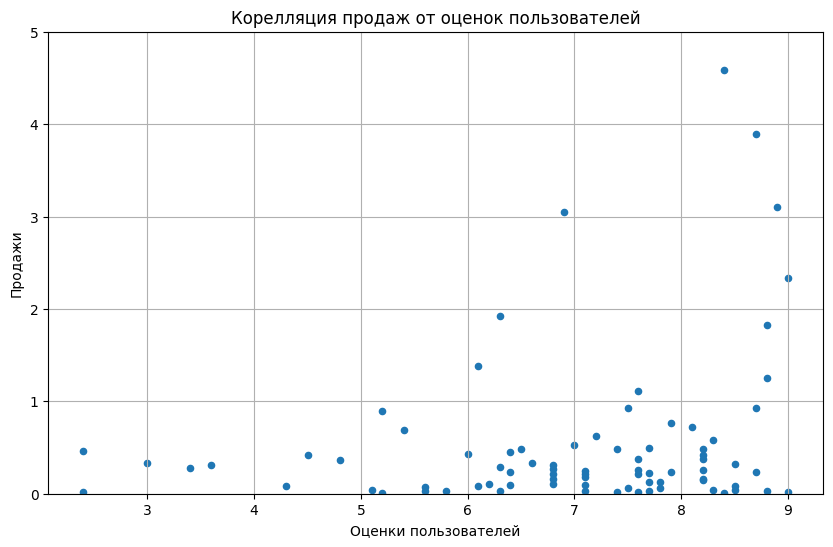

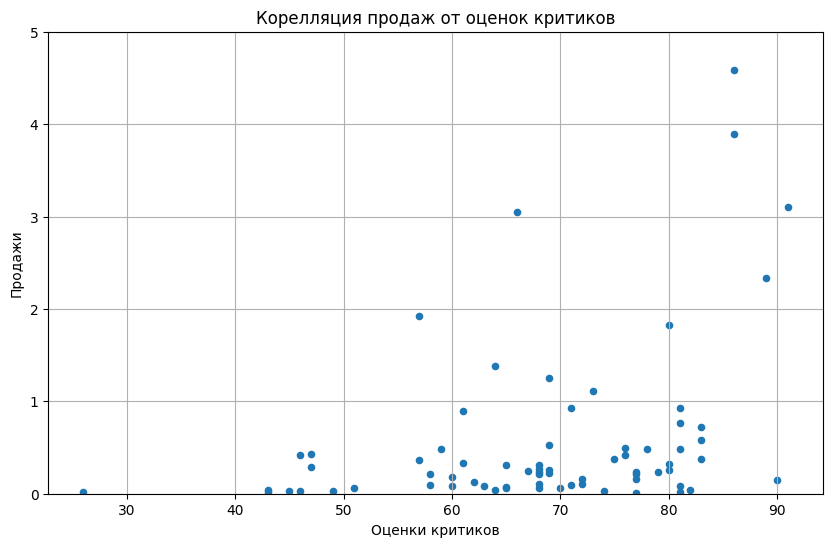

In [33]:
print('Корелляция продаж от оценок пользователей',current_period[current_period['platform']=='3DS']['total_sales'].corr(current_period[current_period['platform']=='3DS']['user_score']))
print('Корелляция продаж от оценок критиков',current_period[current_period['platform']=='3DS']['total_sales'].corr(current_period[current_period['platform']=='3DS']['critic_score']))
current_period[current_period['platform']=='3DS'].plot(kind='scatter',x='user_score', y='total_sales', grid=True,
     figsize=(10,6), ylim=(0,5),title='Корелляция продаж от оценок пользователей', xlabel='Оценки пользователей', ylabel='Продажи')
current_period[current_period['platform']=='3DS'].plot(kind='scatter',x='critic_score', y='total_sales',grid=True,
    figsize=(10,6), ylim=(0,5), title='Корелляция продаж от оценок критиков', xlabel='Оценки критиков', ylabel='Продажи');


Судя по диаграммам рассеяния и по подсчитанным корреляциям, взаимосвязь между продажами и оценками пользователей есть, но незначительная, а вот от оценок критиков продажи зависят больше(корреляция 0.35). Игры, у которых оценки критиков выше, продаются лучше. По крайней мере, внутри платформы '3DS'.

#### Соотнесём выводы с продажами игр на других платформах.

Посчитаем корреляцию между отзывами критиков и продажами и между отзывами пользователей и продажами  для других платформ.

Платформа PS4
Корелляция продаж от оценок пользователей -0.031957105603966966
Корелляция продаж от оценок критиков 0.40656790102834933


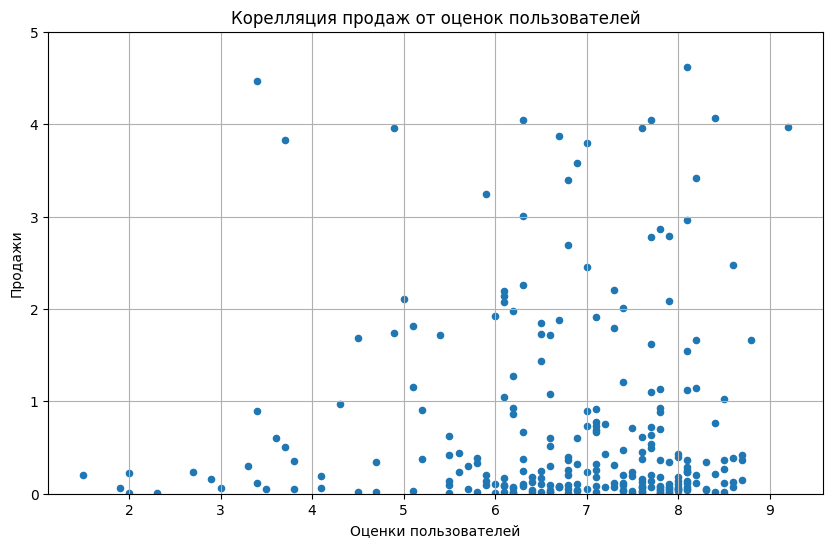

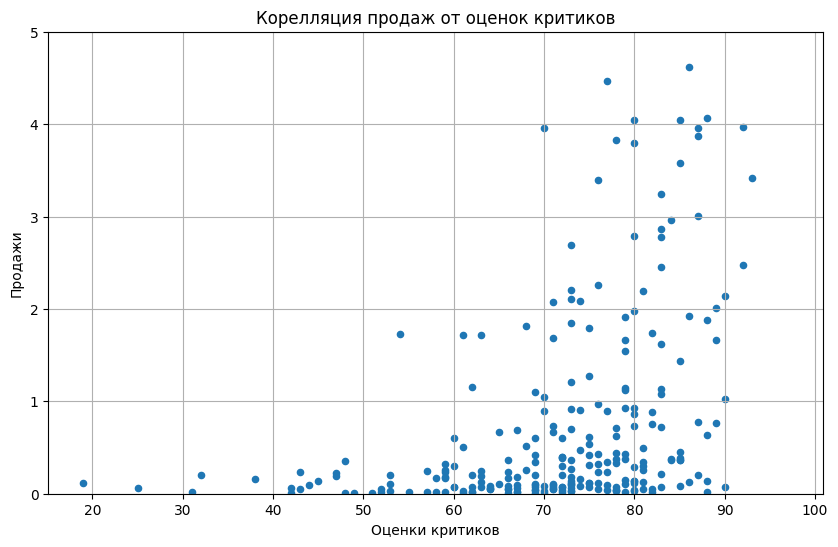

In [34]:
print('Платформа PS4')
print('Корелляция продаж от оценок пользователей',current_period[current_period['platform']=='PS4']['total_sales'].corr(current_period[current_period['platform']=='PS4']['user_score']))
print('Корелляция продаж от оценок критиков',current_period[current_period['platform']=='PS4']['total_sales'].corr(current_period[current_period['platform']=='PS4']['critic_score']))
current_period[current_period['platform']=='PS4'].plot(kind='scatter',x='user_score', y='total_sales', grid=True,
     figsize=(10,6), ylim=(0,5),title='Корелляция продаж от оценок пользователей', xlabel='Оценки пользователей', ylabel='Продажи')
current_period[current_period['platform']=='PS4'].plot(kind='scatter',x='critic_score', y='total_sales',grid=True,
    figsize=(10,6), ylim=(0,5), title='Корелляция продаж от оценок критиков', xlabel='Оценки критиков', ylabel='Продажи');


Платформа PS3
Корелляция продаж от оценок пользователей 0.0023944054662596035
Корелляция продаж от оценок критиков 0.3342853444072756


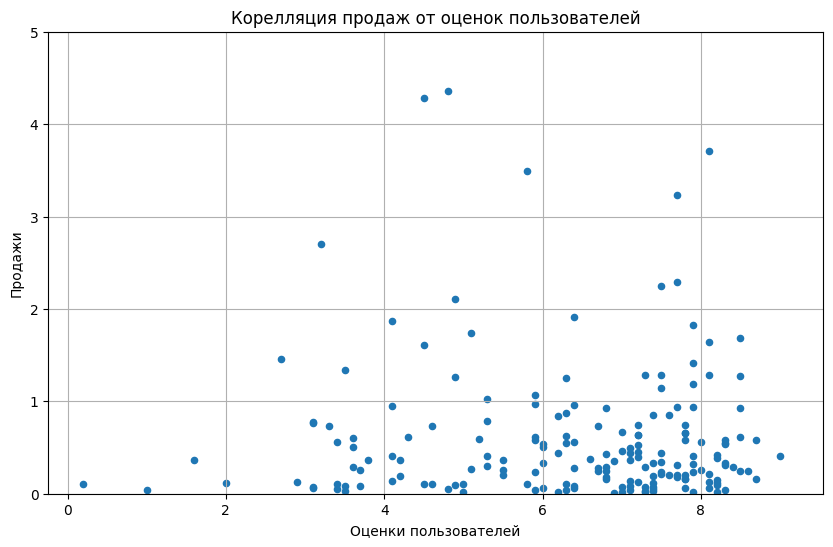

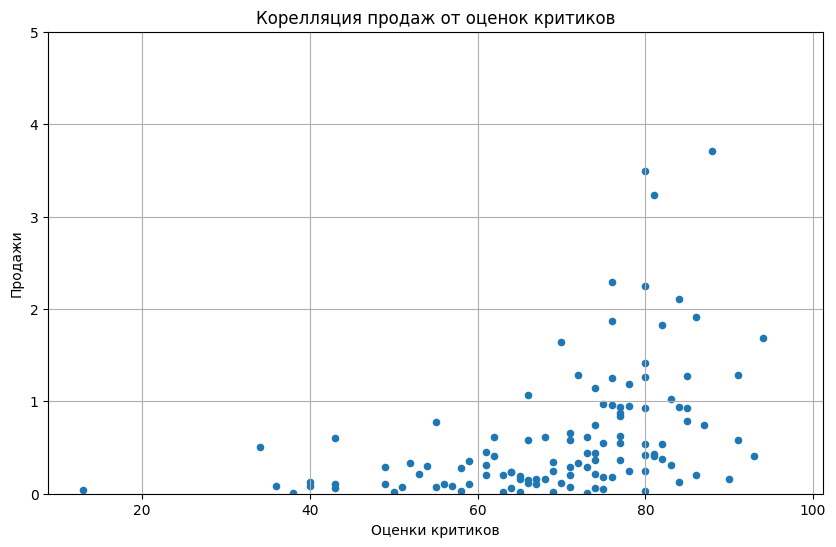

In [35]:
print('Платформа PS3')
print('Корелляция продаж от оценок пользователей',current_period[current_period['platform']=='PS3']['total_sales'].corr(current_period[current_period['platform']=='PS3']['user_score']))
print('Корелляция продаж от оценок критиков',current_period[current_period['platform']=='PS3']['total_sales'].corr(current_period[current_period['platform']=='PS3']['critic_score']))
current_period[current_period['platform']=='PS3'].plot(kind='scatter',x='user_score', y='total_sales', grid=True,
     figsize=(10,6), ylim=(0,5),title='Корелляция продаж от оценок пользователей', xlabel='Оценки пользователей', ylabel='Продажи')
current_period[current_period['platform']=='PS3'].plot(kind='scatter',x='critic_score', y='total_sales',grid=True,
    figsize=(10,6), ylim=(0,5), title='Корелляция продаж от оценок критиков', xlabel='Оценки критиков', ylabel='Продажи');


Платформа XOne
Корелляция продаж от оценок пользователей -0.06892505829722281
Корелляция продаж от оценок критиков 0.41699832684400107


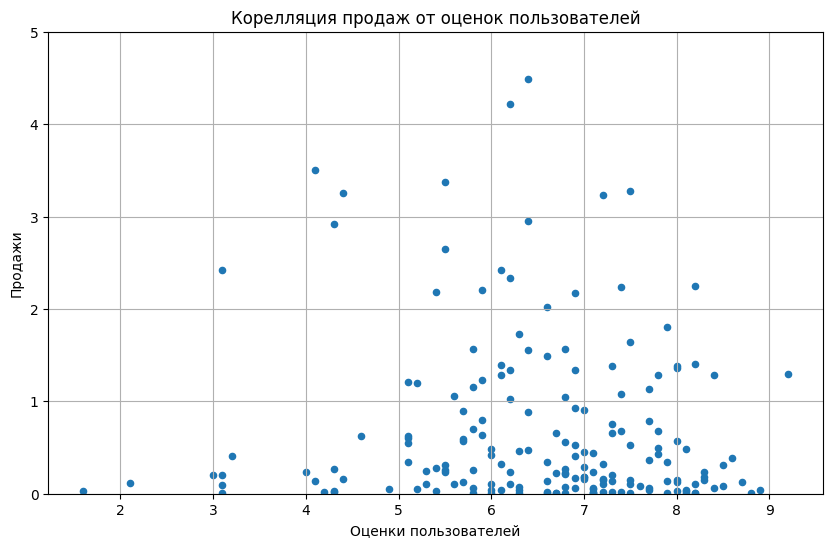

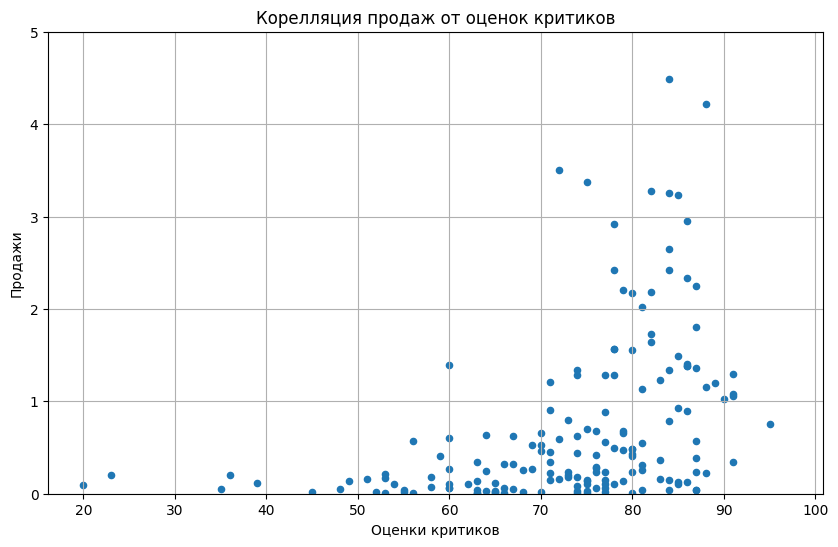

In [36]:
print('Платформа XOne')
print('Корелляция продаж от оценок пользователей',current_period[current_period['platform']=='XOne']['total_sales'].corr(current_period[current_period['platform']=='XOne']['user_score']))
print('Корелляция продаж от оценок критиков',current_period[current_period['platform']=='XOne']['total_sales'].corr(current_period[current_period['platform']=='XOne']['critic_score']))
current_period[current_period['platform']=='XOne'].plot(kind='scatter',x='user_score', y='total_sales', grid=True,
     figsize=(10,6), ylim=(0,5),title='Корелляция продаж от оценок пользователей', xlabel='Оценки пользователей', ylabel='Продажи')
current_period[current_period['platform']=='XOne'].plot(kind='scatter',x='critic_score', y='total_sales',grid=True,
    figsize=(10,6), ylim=(0,5), title='Корелляция продаж от оценок критиков', xlabel='Оценки критиков', ylabel='Продажи');


Платформа X360
Корелляция продаж от оценок пользователей -0.011742173670645215
Корелляция продаж от оценок критиков 0.3503445453630288


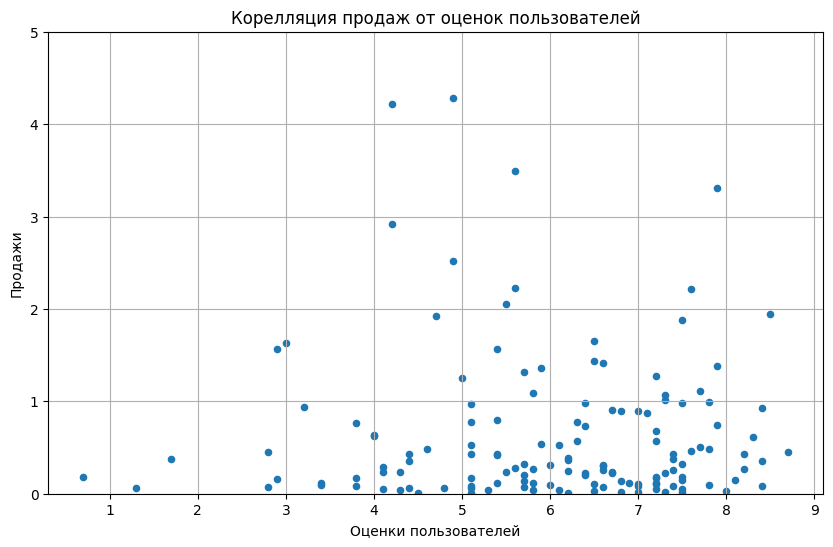

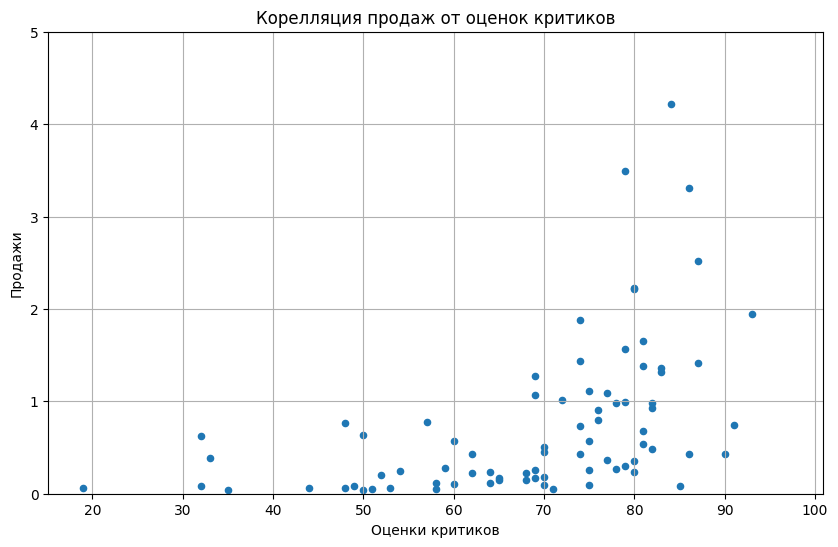

In [37]:
print('Платформа X360')
print('Корелляция продаж от оценок пользователей',current_period[current_period['platform']=='X360']['total_sales'].corr(current_period[current_period['platform']=='X360']['user_score']))
print('Корелляция продаж от оценок критиков',current_period[current_period['platform']=='X360']['total_sales'].corr(current_period[current_period['platform']=='X360']['critic_score']))
current_period[current_period['platform']=='X360'].plot(kind='scatter',x='user_score', y='total_sales', grid=True,
     figsize=(10,6), ylim=(0,5),title='Корелляция продаж от оценок пользователей', xlabel='Оценки пользователей', ylabel='Продажи')
current_period[current_period['platform']=='X360'].plot(kind='scatter',x='critic_score', y='total_sales',grid=True,
    figsize=(10,6), ylim=(0,5), title='Корелляция продаж от оценок критиков', xlabel='Оценки критиков', ylabel='Продажи');


Платформа WiiU
Корелляция продаж от оценок пользователей 0.4193304905451974
Корелляция продаж от оценок критиков 0.37641490703851044


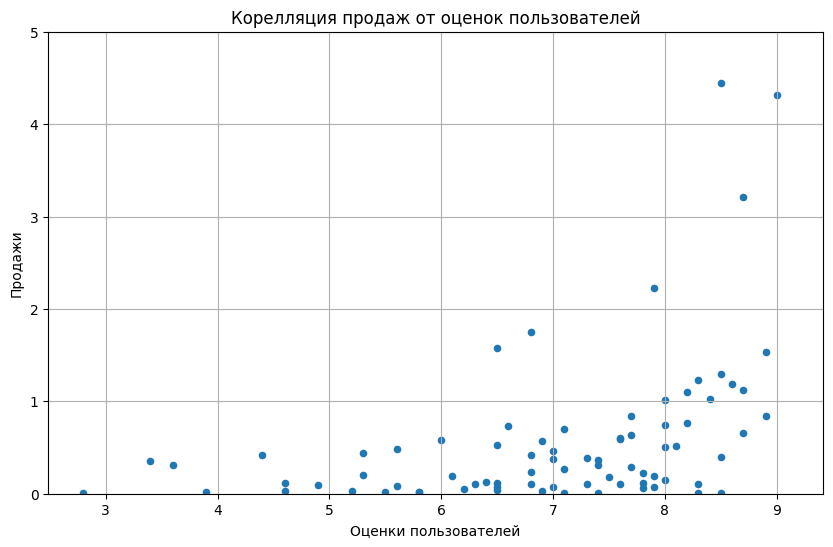

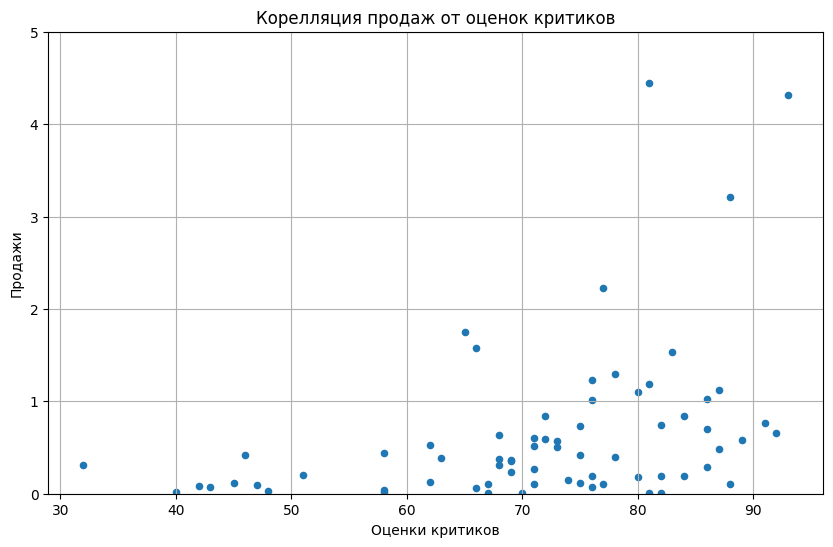

In [38]:
print('Платформа WiiU')
print('Корелляция продаж от оценок пользователей',current_period[current_period['platform']=='WiiU']['total_sales'].corr(current_period[current_period['platform']=='WiiU']['user_score']))
print('Корелляция продаж от оценок критиков',current_period[current_period['platform']=='WiiU']['total_sales'].corr(current_period[current_period['platform']=='WiiU']['critic_score']))
current_period[current_period['platform']=='WiiU'].plot(kind='scatter',x='user_score', y='total_sales', grid=True,
     figsize=(10,6), ylim=(0,5),title='Корелляция продаж от оценок пользователей', xlabel='Оценки пользователей', ylabel='Продажи')
current_period[current_period['platform']=='WiiU'].plot(kind='scatter',x='critic_score', y='total_sales',grid=True,
    figsize=(10,6), ylim=(0,5), title='Корелляция продаж от оценок критиков', xlabel='Оценки критиков', ylabel='Продажи');


При рассмотрении на других платформах влияния на продажи отзывов пользователей и критиков, не везде есть связь между отзывами и продажами, а в некоторых случаях даже есть платформы, на которых игры с хорошими оценками продаются плохо. Почти на всех платформах зависимость продаж от оценок критиков выше, чем от оценок пользователей.

#### Посмотрим на общее распределение игр по жанрам. 

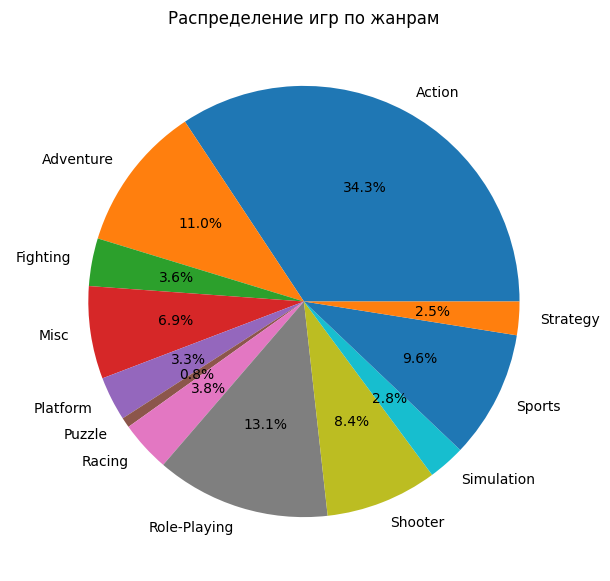

In [39]:
current_period.groupby('genre')['genre'].count().plot(kind='pie',figsize=(7,7), ylabel= ' ', title='Распределение игр по жанрам',autopct='%1.1f%%',);


In [40]:
current_period.groupby('genre').agg({'total_sales':['mean','median','count','sum']}).sort_values(('total_sales','mean'),ascending = False)

total_sales                         
                    mean median count         sum
genre                                            
Shooter         1.245882  0.450   187  232.979996
Sports          0.703972  0.240   214  150.649994
Platform        0.576081  0.225    74   42.630001
Role-Playing    0.499623  0.125   292  145.889999
Racing          0.469294  0.120    85   39.889999
Fighting        0.441375  0.125    80   35.310001
Action          0.420196  0.110   766  321.869995
Misc            0.405290  0.100   155   62.820000
Simulation      0.350968  0.100    62   21.760000
Puzzle          0.186471  0.060    17    3.170000
Strategy        0.180000  0.080    56   10.080000
Adventure       0.096490  0.030   245   23.639999

Больше всего продаётся игр жанра Action, меньше всего Strategy и Puzzle. Но всё же наиболее прибыльным можно назвать жанр Shooter и Sports. У них наибольшие средние и медианы, что говорит о стабильно высоком доходе. А наименее прибыльным Adventure - количество игр большое, а прибыль маленькая. Жанр Action с высокими общими продажами только в середине списка.

**Вывод:**
 Количество выпущенных игр начало расти с 1994г., более сильный скачок в 2002г., с 2010 количество выпущенных игр начинает падать, возможно в связи с большим распространением мобильных игр. Наибольшие суммарные продажи за все время у платформ PS2, X360, PS3, Wii и DS. Очень характерно, что срок существования платформы около 10 лет.За последние 2 года продажи по всем платформам падают, но всё же наиболее прибыльными можно считать PS4, XOne и 3DS. Сумма продаж их выше в последнее время и появились они относительно недавно. Если учитывать срок существования около 10 лет, у них всё впереди. Для многих платформ  взаимосвязь между продажами и оценками пользователей очень незначительная, а вот от оценок критиков продажи зависят больше. Скорее всего, для людей мнение критиков важнее мнения других пользователей. Больше всего продаётся игр жанра Action, меньше всего Strategy и Puzzle. Но всё же наиболее прибыльным можно назвать жанр Shooter и Sports. У них наибольшие средние и медианы, что говорит о стабильно высоком доходе. А наименее прибыльным Adventure - количество игр большое, а прибыль маленькая. Жанр Action с высокими общими продажами только в середине списка.


### Составим портрет пользователя каждого региона.

Определим для пользователя каждого региона (NA, EU, JP):

**Самые популярные платформы (топ-5).**

**Самые популярные жанры (топ-5).**

**Влияет ли рейтинг ESRB на продажи в отдельном регионе?**

По рейтингу компьтерных игр от организации ESRB (англ. Entertainment Software Rating Board):
* EC - «Для детей младшего возраста» 
* E10 - «Для всех от 10 лет и старше»  
* T - «Подросткам»
* E - «Для всех»  
* M - «Для взрослых»
* RP - «Рейтинг ожидается»

#### Северная америка (NA).

In [41]:
current_period.pivot_table(index=['platform'],values=['na_sales','eu_sales','jp_sales'],aggfunc='sum')

,eu_sales,jp_sales,na_sales
platform,,,
3DS,30.959999,67.809998,38.200001
DS,0.850000,0.000000,0.570000
PC,25.360001,0.000000,11.110000
PS3,67.809998,23.350000,63.500000
PS4,141.089996,15.960000,108.739998
PSP,0.170000,3.290000,0.000000
PSV,6.100000,18.590000,5.040000
Wii,5.930000,0.050000,6.560000
WiiU,19.850000,10.880000,29.209999


In [42]:
def region_analysis(region):
    popular_platforms=current_period.groupby('platform')[region].sum().sort_values(ascending = False).head()
    fraction=(current_period.groupby('platform')[region].sum().sort_values(ascending = False).head())/(current_period[region].sum())
    critic_user = pd.concat([popular_platforms,fraction],axis='columns')
    print('')
    print('Самые популярные платформы (топ-5) и их доля от продаж в',region)
    display(critic_user)
    print('')
    print('Самые популярные жанры (топ-5) в',region)
    display(current_period.groupby('genre').agg({region:['sum']}).sort_values(by=(region,'sum'),ascending = False).head())
    print('')
    print('Популярные категории')
    display(current_period.groupby('rating').agg({region:['sum']}).sort_values(by=(region,'sum'),ascending = False).head())
region_analysis('na_sales')  


Самые популярные платформы (топ-5) и их доля от продаж в na_sales


,na_sales,na_sales
platform,,
PS4,108.739998,0.248429
XOne,93.120003,0.212744
X360,81.659996,0.186562
PS3,63.500000,0.145073
3DS,38.200001,0.087272



Самые популярные жанры (топ-5) в na_sales


,na_sales
,sum
genre,
Action,126.050003
Shooter,109.739998
Sports,65.269997
Role-Playing,46.400002
Misc,27.490000



Популярные категории


,na_sales
,sum
rating,
M,165.210007
RP,89.419998
E,79.050003
E10+,54.240002
T,49.790001


В Северной Америке самые популярные платформы PS4, XOne	,X360, PS3 и 3DS. Причем лидирующее место занимает PS4, она занимает 24% продаж рынка. Это игровая приставка восьмого поколения, выпускаемая японской компанией Sony. Её конкурент игровая приставка от компании Microsoft на 2 месте(21% рынка Америки). Самые популярные жанры Action, Sports, Shooter, Misc и Role-Playing. Action с заметным отрывом, но их и выпускается намного больше. По рейтингу ESRB, если не брать в расчёт игры, где «Рейтинг ожидается», больше всего продано категории M - «Для взрослых». За ней E - «Для всех», хотя это самая многочисленная группа.

#### Европа (EU).

In [43]:
region_analysis('eu_sales')


Самые популярные платформы (топ-5) и их доля от продаж в eu_sales


,eu_sales,eu_sales
platform,,
PS4,141.089996,0.359712
PS3,67.809998,0.172883
XOne,51.590000,0.131530
X360,42.520000,0.108406
3DS,30.959999,0.078933



Самые популярные жанры (топ-5) в eu_sales


,eu_sales
,sum
genre,
Action,118.129997
Shooter,87.860001
Sports,60.520000
Role-Playing,36.970001
Racing,20.190001



Популярные категории


,eu_sales
,sum
rating,
M,145.320007
E,83.360001
RP,78.909996
E10+,42.689999
T,41.950001


В Европе так же самая популярная платформа PS4 (36% Европейского рынка). В Топ5 так же как и в Северной Америке входят PS3, X360, XOne, 3DS. Топ популярных жанров в Европе очень похож на Американский, только замыкает топ5 Racing, а не Misc	 как в Америке. А по рейтингу здесь полностью совпадает с рейтингом в Северной Америке.

#### Япония (JP).

In [44]:
region_analysis('jp_sales')


Самые популярные платформы (топ-5) и их доля от продаж в jp_sales


,jp_sales,jp_sales
platform,,
3DS,67.809998,0.481674
PS3,23.350000,0.165862
PSV,18.590000,0.132050
PS4,15.960000,0.113368
WiiU,10.880000,0.077284



Самые популярные жанры (топ-5) в jp_sales


,jp_sales
,sum
genre,
Role-Playing,51.040001
Action,40.490002
Misc,9.200000
Fighting,7.650000
Shooter,6.610000



Популярные категории


,jp_sales
,sum
rating,
RP,85.050003
T,20.590000
E,15.140000
M,14.110000
E10+,5.890000


Посмотрим, на какой платформе выпускается больше игр лидирующего здесь жанра 'Role-Playing'.

In [45]:
role_playing = current_period[current_period['genre']=='Role-Playing']
role_playing['platform'].value_counts()

PSV     78
3DS     62
PS4     51
PS3     49
PC      18
XOne    14
X360     8
PSP      7
WiiU     5
Name: platform, dtype: int64

В отличие от Северной Америки и Европы, где рейтинги очень похожи, в Японии самые популярные платформы - 3DS, PS3, PSV, PS4 и Wii. А топ жанров возгдавляет здесь 'Role-Playing', что не удивительно, большинство игр этого жанра выпускается на лидирующей здесь платформе 3DS. 

<!-- В отличие от Северной Америки и Европы, где предпочтения очень похожи, в Японии самые популярные платформы DS3DS,PS3,PSP,Wii	 -->

Для наглядности рейтинг ESRB в каждом регионе посмотрим на столбчатой диаграмме.

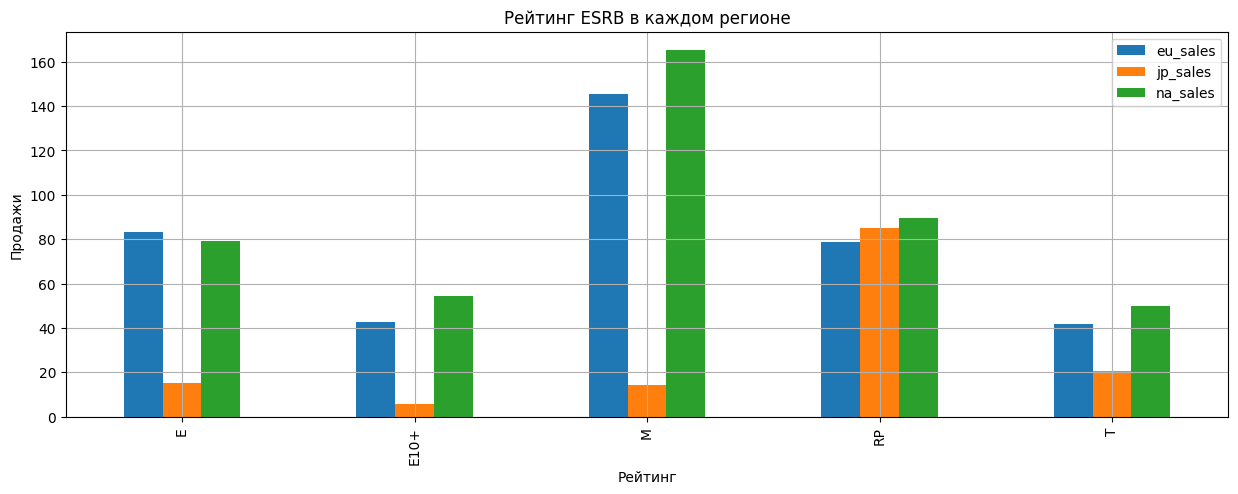

In [46]:
current_period.pivot_table(index=['rating'],values=['na_sales','eu_sales','jp_sales'],aggfunc='sum').plot(kind='bar',figsize=(15,5),grid=True)
plt.title('Рейтинг ESRB в каждом регионе')
plt.xlabel('Рейтинг')
plt.ylabel('Продажи');

По рейтингу ESRB, если не брать в расчёт игры, где «Рейтинг ожидается», в Северной Америке и Европе больше всего продано игр категории M - «Для взрослых», а в Японии - T - «Подросткам». На втором месте в Европе, Америке и Японии-  E - «Для всех».

**Вывод:**
По влиянию рейтинга ESRB Северная Америка и Европа идентичны. Лидируют M - «Для взрослых»,E - «Для всех» и  T - «Подросткам» соответственно, а в Японии предпочтения отличаются. Там ровно противоположно, на 1 месте  T - «Подросткам» , затем E - «Для всех» и M - «Для взрослых» только на 3 месте.

### Проверим гипотезы:

#### Проверка гипотезы: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

H_0: Пользовательские рейтинги(user_score) платформы Xbox One = пользовательские рейтинги(user_score) платформы PC

H_a: Пользовательские рейтинги(user_score) платформы Xbox One ≠ пользовательские рейтинги(user_score) платформы PC

alpha = 0.05

In [47]:
rating_Xbox_One = current_period[current_period['platform']=='XOne']['user_score']
rating_PC = current_period[current_period['platform']=='PC']['user_score']

Проверим выборки на нормальность распределения.

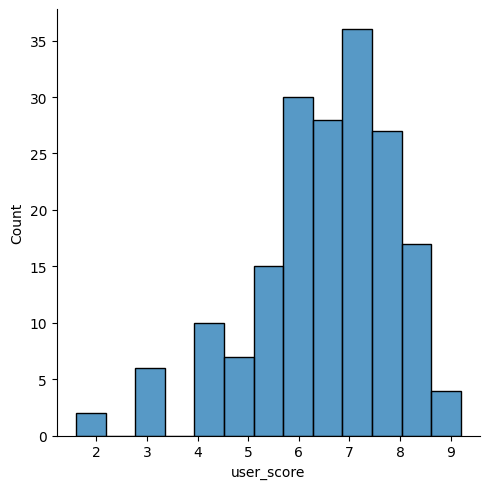

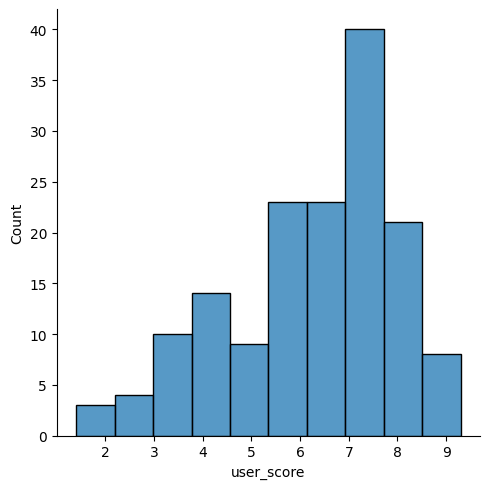

In [48]:
sns.displot(rating_Xbox_One)
sns.displot(rating_PC);

In [49]:
print(st.shapiro(rating_Xbox_One))
st.shapiro(rating_PC)

ShapiroResult(statistic=nan, pvalue=1.0)


ShapiroResult(statistic=nan, pvalue=1.0)

Гистограммы распределения и критерий Шапиро-Уилка подтверждают нормальность распределения выборок. Можно использовать параметрический t-критерий Стьюдента. Двухвыборочный t-критерий для независимых выборок.

In [50]:
results = st.ttest_ind(rating_Xbox_One.dropna(),rating_PC.dropna(),equal_var=False)

alpha = 0.05 
print(results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

0.147597032047728
Не получилось отвергнуть нулевую гипотезу


**Вывод:** На основе имеющихся данных на уровне значимости 5% есть основания не отвергать нулевую гипотезу в пользу альтернативной. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

#### Проверка гипотезы: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

H_0: Пользовательские рейтинги(user_score) жанра Action = пользовательские рейтинги(user_score) жанра Sports

H_a: Пользовательские рейтинги(user_score) жанра Action ≠ пользовательские рейтинги(user_score) жанра Sports

alpha = 0.05

In [51]:
rating_Action = current_period[current_period['genre']=='Action']['user_score']
rating_Sports = current_period[current_period['genre']=='Sports']['user_score']


Проверим выборки на нормальность распределения.

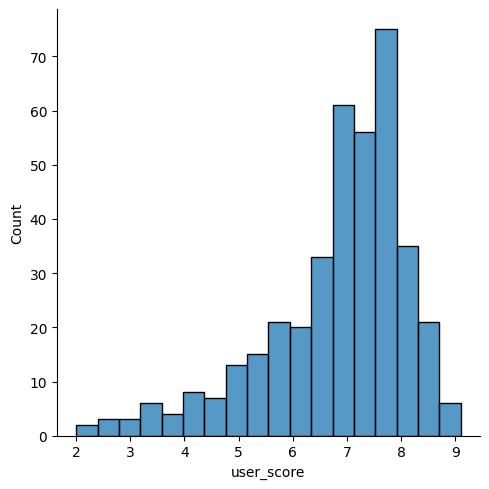

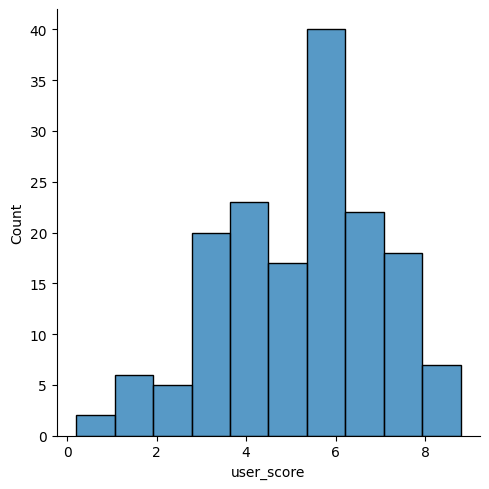

In [52]:
sns.displot(rating_Action)
sns.displot(rating_Sports);

In [53]:
print(st.shapiro(rating_Action))
st.shapiro(rating_Sports)

ShapiroResult(statistic=nan, pvalue=1.0)


ShapiroResult(statistic=nan, pvalue=1.0)

Гистограммы распределения и критерий Шапиро-Уилка подтверждают нормальность распределения выборок. Можно использовать параметрический t-критерий Стьюдента. Двухвыборочный t-критерий для независимых выборок.

In [54]:
results = st.ttest_ind(rating_Action.dropna(),rating_Sports.dropna(),equal_var=False)

alpha = 0.05 
print(results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

1.4459989209941613e-20
Отвергаем нулевую гипотезу


**Вывод:** На основе имеющихся данных на уровне значимости 5% есть основания отвергнуть нулевую гипотезу в пользу альтернативной. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

### Вывод:
Количество выпущенных игр начало расти с 1994г., более сильный скачок в 2002г., с 2010 количество выпущенных игр начинает падать, возможно в связи с большим распространением мобильных игр. Наибольшие суммарные продажи за все время у платформ PS2, X360, PS3, Wii и DS. Очень характерно, что срок существования платформы около 10 лет.За последние 2 года продажи по всем платформам падают, но всё же наиболее прибыльными можно считать PS4, XOne и 3DS. Сумма продаж их выше в последнее время и появились они относительно недавно. Если учитывать срок существования около 10 лет, у них всё впереди. Для многих платформ взаимосвязь между продажами и оценками пользователей очень незначительная, а вот от оценок критиков продажи зависят больше. Скорее всего, для людей мнение критиков важнее мнения других пользователей. Больше всего продаётся игр жанра Action, меньше всего Strategy и Puzzle. Но всё же наиболее прибыльным можно назвать жанр Shooter и Sports. У них наибольшие средние и медианы, что говорит о стабильно высоком доходе. А наименее прибыльным Adventure - количество игр большое, а прибыль маленькая. Жанр Action с высокими общими продажами только в середине списка. Если рассмотреть регионы(Северная Америка, Европа, Япония)по отдельности, получается В Северной Америке самые популярные платформы PS4, XOne ,X360, PS3 и 3DS. Причем лидирующее место занимает PS4, она занимает 24% продаж рынка. Это игровая приставка восьмого поколения, выпускаемая японской компанией Sony. Её конкурент игровая приставка от компании Microsoft на 2 месте(21% рынка Америки). Самые популярные жанры Action, Sports, Shooter, Misc и Role-Playing. Action с заметным отрывом, но их и выпускается намного больше. По рейтингу ESRB, если не брать в расчёт игры, где «Рейтинг ожидается», больше всего продано категории M - «Для взрослых». За ней E - «Для всех», хотя это самая многочисленная группа. В Европе так же самая популярная платформа PS4 (36% Европейского рынка). В Топ5 так же как и в Северной Америке входят PS3, X360, XOne, 3DS. Топ популярных жанров в Европе очень похож на Американский, только замыкает топ5 Racing, а не Misic как в Америке. А по рейтингу здесь полностью совпадает с рейтингом в Северной Америке. В отличие от Северной Америки и Европы, где рейтинги очень похожи, в Японии самые популярные платформы - 3DS, PS3, PSV, PS4 и Wii. А топ жанров возгдавляет здесь 'Role-Playing', что не удивительно, большинство игр этого жанра выпускается на лидирующей здесь платформе 3DS.  
 Средние пользовательские рейтинги платформ Xbox One и PC разные.По влиянию рейтинга ESRB Северная Америка и Европа идентичны. Лидируют M - «Для взрослых»,E - «Для всех» и  T - «Подросткам» соответственно, а в Японии предпочтения отличаются. Там ровно противоположно, на 1 месте  T - «Подросткам» , затем E - «Для всех» и M - «Для взрослых» только на 3 месте.
При проверке гипотезы: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые, с большой вероятностью около 95% можно сказать, что не удалось опровергнуть гипотезу. 
И при проверке гипотезы: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные. Очень вероятно, что так и есть.